In [29]:
import json
import os
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

In [30]:
os.chdir(r"C:\Users\aralmeida\Downloads\T1DM_pred_experiments")

In [31]:
# Read json
with open('results_dictionary.json') as json_file:
    results = json.load(json_file)

In [32]:
results['mikael_sensor_single_N96_step1_PH5_june-21_min-max_None_1D-UNET-non-compres_ISO_loss']['normal '].keys()

dict_keys(['RMSE', 'MAE', 'MAPE', 'ISO', 'PARKES'])

In [33]:
metrics = ["RMSE", "MAE", "MAPE", "ISO", "PARKES"]

In [34]:
# Create Dataframe containing the results 
df = pd.DataFrame(columns = ["Experiment","RMSE", "MAE", "MAPE", "ISO", "PARKES"])  
    


In [35]:
results['mikael_sensor_single_N96_step1_PH5_june-21_min-max_None_1D-UNET-non-compres_ISO_loss']['normal '].keys()    


dict_keys(['RMSE', 'MAE', 'MAPE', 'ISO', 'PARKES'])

In [36]:
# Fill the Dataframe with the results
idx = 0

for key in results:
    for metric in metrics: 
        df.loc[idx, "Experiment"] = key
        df.loc[idx, metric] = results[key]['normal '][metric]
    idx += 1 

In [37]:
# Two subdataframes with RMSE and ISO loss for further comparison
df_rmse = pd.DataFrame(columns = ["Experiment","RMSE", "MAE", "MAPE", "ISO", "PARKES"])  
df_ISO =  pd.DataFrame(columns = ["Experiment","RMSE", "MAE", "MAPE", "ISO", "PARKES"])  

for idx in df.index:
    if df.loc[idx, "Experiment"].find("ISO") != -1:
        #df.loc[idx, "Loss"] = "ISO"
        df_rmse = df_rmse.append(df.loc[idx])
        # reset index
        df_rmse = df_rmse.reset_index(drop=True)
    else:
        #df.loc[idx, "Loss"] = "RMSE"
        df_ISO = df_ISO.append(df.loc[idx])
        # reset index
        df_ISO = df_ISO.reset_index(drop=True)

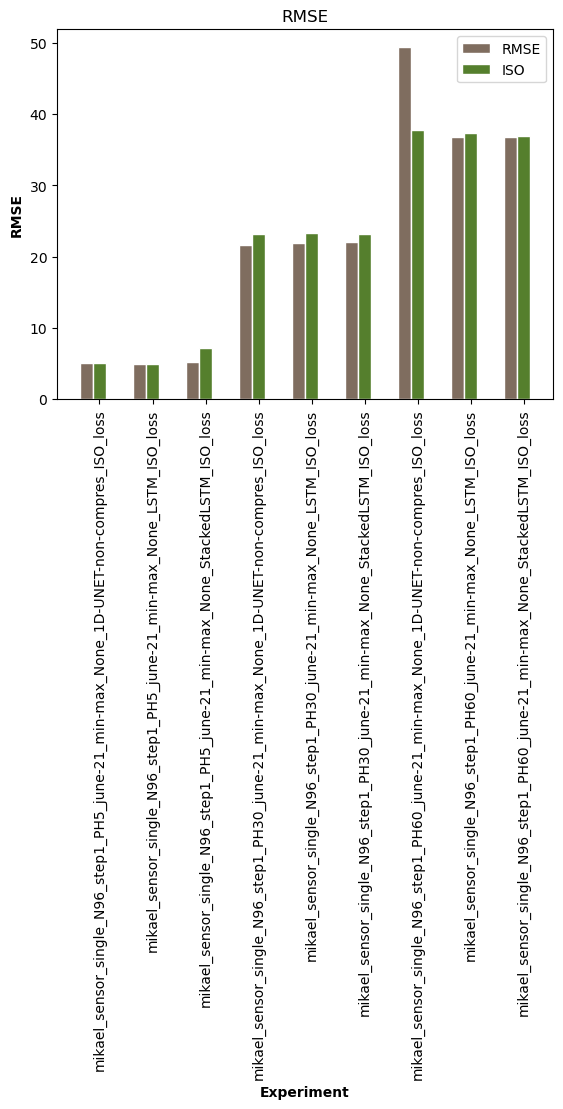

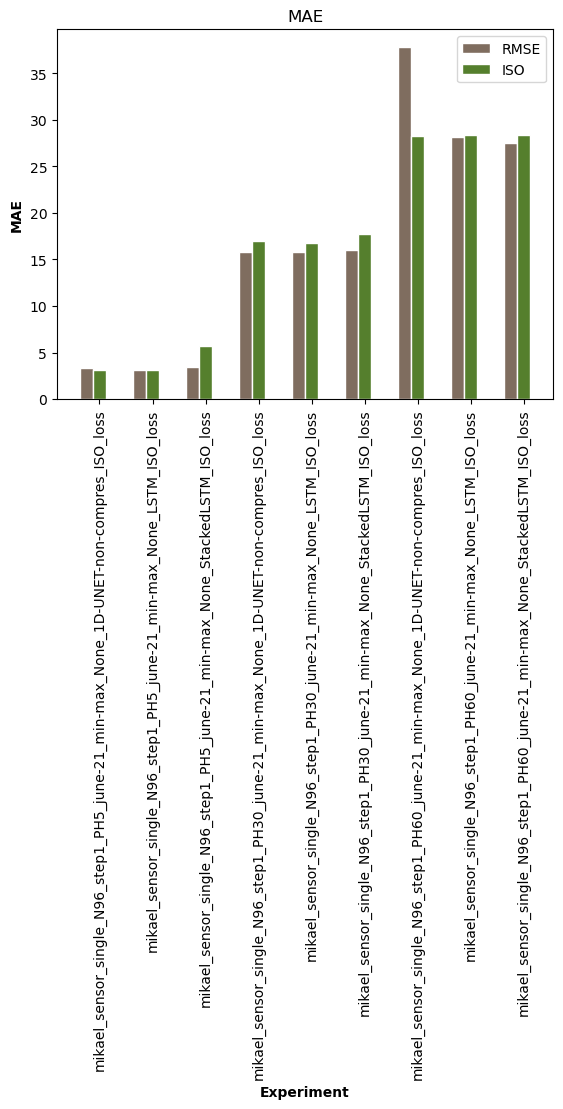

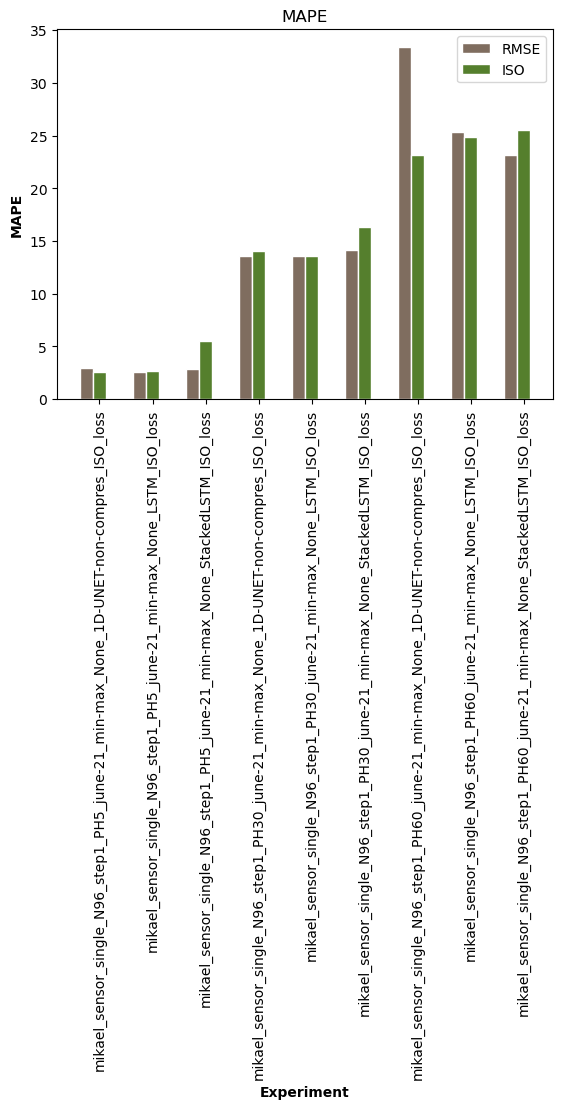

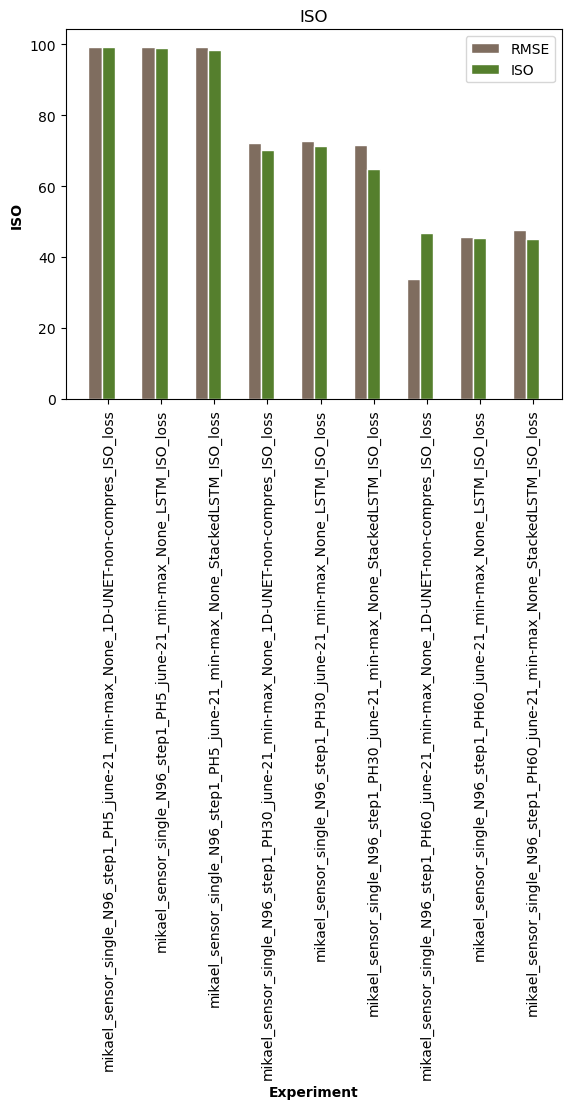

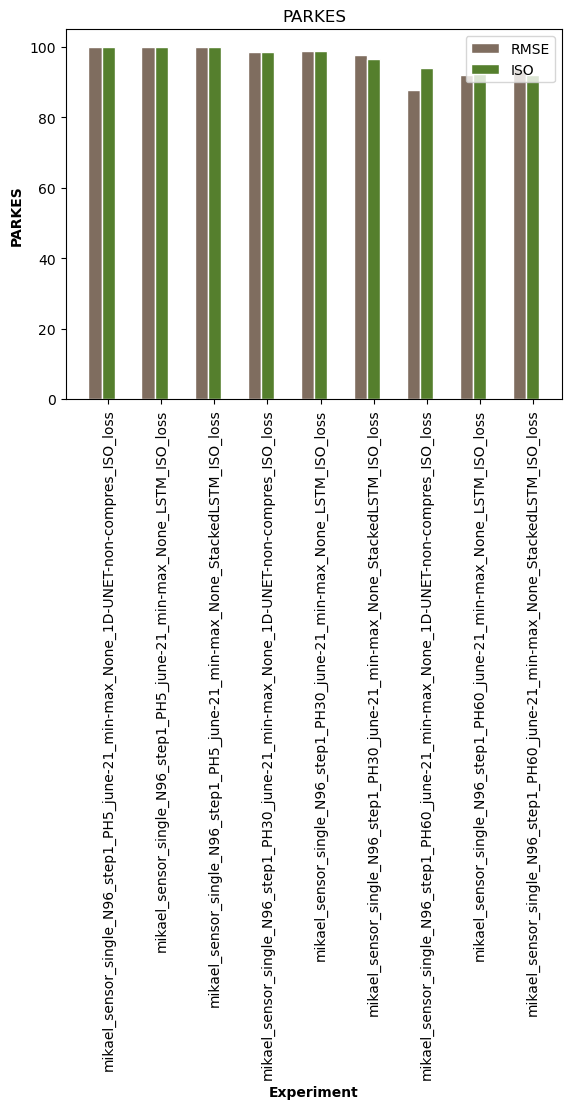

In [39]:
# Barplot comparing the results of the two losses
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
barWidth = 0.25

for metric in metrics:     
    
    # set height of bar
    bars_rmse = df_rmse[metric]
    bars_ISO = df_ISO[metric]

    # Set position of bar on X axis
    r1 = np.arange(len(bars_rmse))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars_rmse, color='#7f6d5f', width=barWidth, edgecolor='white', label='RMSE')
    plt.bar(r2, bars_ISO, color='#557f2d', width=barWidth, edgecolor='white', label='ISO')

    # Add xticks on the middle of the group bars
    plt.xlabel('Experiment', fontweight='bold')
    plt.ylabel(metric, fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars_rmse))], df_rmse["Experiment"], rotation=90)
    plt.title(metric)

    # Create legend & Show graphic
    plt.legend()
    plt.show()